In [1]:
#import libraries
import os
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read in data
data = pd.read_csv('/Users/deepshikasharma/Downloads/Viamo_sample/3m_uganda-3m_uganda_000000000013.csv')

In [3]:
#select relevant columns for analysis
df = data[['call_date','call_id','km_block_listened','listener']]

`km_block_listened` If this block is a KM and user listened to at least 75% of it, block_interaction_id goes here. Tells us a (unknown) user inteacted with and listened to this KM.

`listener` If this block is a KM and user listened to at least 75% of it, subscriber_id goes here. Tells us which (known) user listened to this KM and that they listened to it.

Don't need this column, because we don't need to know which users listen to KM just how many KMs users listen to.

In [4]:
#drop NaN values
df1 = df.dropna(subset = ['km_block_listened'])

In [5]:
#convert call_date data type from object to datetime
df1['call_date'] = pd.to_datetime(df.call_date)

In [6]:
#extract month from call_date column 
df1['Month'] = df1['call_date'].dt.month_name()

In [7]:
#remove call_date column
df1.drop(['call_date','call_id','listener'], inplace = True, axis=1)

In [8]:
#need to custom sort the dataframe by month chronologically
months_categories = ["August", "September", "October", "November"]
df1["Month"] = pd.Categorical(df1["Month"], categories = months_categories)
df1 = df1.sort_values(by = "Month")

Count the total number and average number of blocks listened to each month. Only need the `km_block_listened` column because it already tells us that the user listened to the KM during the call.

In [9]:
#count total number of KM blocks listened to per month
mau1 = df1.groupby('Month').count().reset_index()
#just making sure df1 is a dataframe before next operation
mau1 = pd.DataFrame(mau1)

In [10]:
#rename km_block_listened to Total # of KMs Listened
mau1.rename(columns = {'km_block_listened':'# of KMs Listened'}, 
            inplace = True)

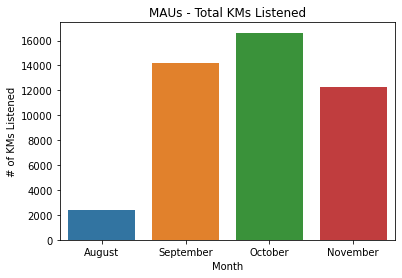

In [11]:
sns.barplot(data = mau1, x = mau1['Month'], 
            y = mau1['# of KMs Listened']).set(title = "MAUs - Total KMs Listened")
plt.savefig('Total_KMs_Listened.jpeg', bbox_inches='tight')

What is the average number of KMs MAUs listen to?

In [12]:
mau2 = mau1.describe()

In [13]:
mau2.style.background_gradient(cmap='YlOrRd')

,# of KMs Listened
count,4.000000
mean,11372.750000
std,6242.396034
min,2402.000000
25%,9791.750000
50%,13230.000000
75%,14811.000000
max,16629.000000


<AxesSubplot:xlabel='# of KMs Listened'>

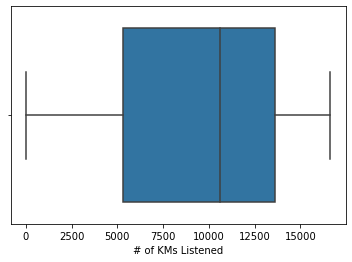

In [14]:
sns.boxplot(data=mau2, x=mau2["# of KMs Listened"])

Create two dataframe one with unique values in the `call_id` column and one with only repeating values in the `call_id` column.

In [15]:
df['Duplicates'] = df.duplicated(subset=['call_id'])

True means this `call_id` is duplicated (the user interacted with more than one block on the call).
False means this `call_id` is not duplicated (the user only interacted with one block on the call).

In [16]:
df3 = df

In [17]:
#convert call_date data type from object to datetime
df3['call_date'] = pd.to_datetime(df.call_date)
#extract month from call_date column 
df3['Month'] = df3['call_date'].dt.month_name()

In [18]:
#need to custom sort the dataframe by month chronologically
months_categories = ["August", "September", "October", "November"]
df3["Month"] = pd.Categorical(df3["Month"], categories = months_categories)
df3 = df3.sort_values(by = "Month")

In [19]:
#drop NaN values because rows with NaN values in `km_block_listened` column means user did not listen to KM.
df3 = df3.dropna(subset = ['km_block_listened'])

In [20]:
df3.drop(['call_id', 'listener','call_date','km_block_listened'], inplace = True, axis=1)

In [21]:
dups = df3.loc[df3['Duplicates'] == True]

In [22]:
no_dups = df3.loc[df3['Duplicates'] == False]

In [23]:
dups = dups.groupby('Month').count().reset_index()

In [24]:
dups.rename(columns = {'Duplicates':'1+ KMs per call'},
            inplace = True)

In [25]:
no_dups = no_dups.groupby('Month').count().reset_index()

In [26]:
no_dups.rename(columns = {'Duplicates':'1 KM per call'}, 
            inplace = True)

In [27]:
extracted_col = dups["1+ KMs per call"]

In [28]:
no_dups = no_dups.join(extracted_col)

In [29]:
ready = no_dups

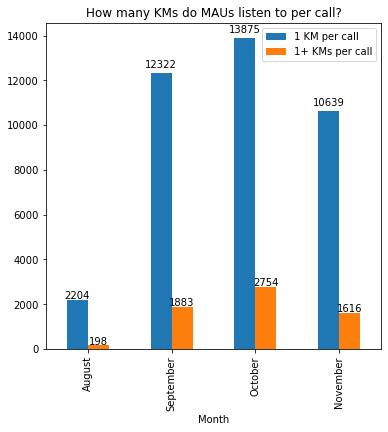

In [30]:
plt.rcParams["figure.figsize"] = (6, 6)
ax = ready.plot(x='Month', y =['1 KM per call','1+ KMs per call'],kind='bar')

ax.set_title('How many KMs do MAUs listen to per call?')
ax.legend(bbox_to_anchor=(1.0, 1.0))

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    
plt.savefig('KMs_listened_per_call.jpeg', bbox_inches='tight')